In [23]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat('targets_c60.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'class_cov', 'class_mu', 'class_sigma', 'id', 'image_numbers', 'image_weights', 'targets', 'wh'])


### Image weights
On [line 94](https://github.com/ultralytics/xview-yolov3/blob/master/utils/datasets.py#L94) of `datasets.py`, we appear to sample images unequally. In particular, we use image weights, which are calculated on [line 50](https://github.com/ultralytics/xview-yolov3/blob/7cb82fe718c9dc4b7b7570433d3ec9060c709361/utils/analysis.m#L50) of `analysis.m` and then stored in the `targets_c60.mat` file, which is then used everywhere else.

Hypothesis: an image's weight is the sum of the class weights of all the bounding boxes in its chips. Unclear how the class weights are calculated though.

In [21]:
img_weights = mat['image_weights'].squeeze()

(847,)


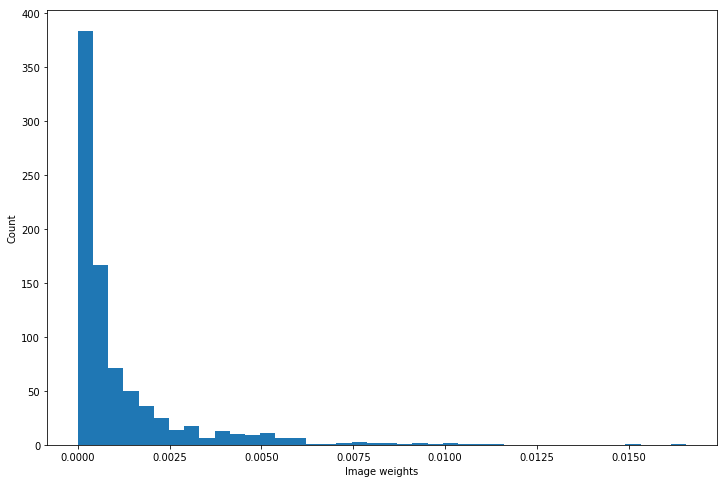

In [24]:
plt.figure(figsize=(12,8))
plt.hist(img_weights, 40)
plt.xlabel('Image weights')
plt.ylabel('Count')
# plt.xticks(np.linspace(0, 1000, num=21))
plt.show()